In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
# CustomerId — идентификатор клиента
# Surname — фамилия клиента
# CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
# Geography — страна клиента (банк международный)
# Gender — пол клиента
# Age — возраст клиента
# Tenure — сколько лет клиент пользуется услугами банка
# Balance — баланс на счетах клиента в банке
# NumOfProducts — количество услуг банка, которые приобрёл клиент
# HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
# IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
# EstimatedSalary — предполагаемая заработная плата клиента
# Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [4]:
# ЗАДАНИЯ

# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
# Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [5]:
url='https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block/churn.zip'
churn_data = pd.read_csv(url)
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
churn_data['Exited'].info

<bound method Series.info of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

In [8]:
churn_data.groupby('Exited').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


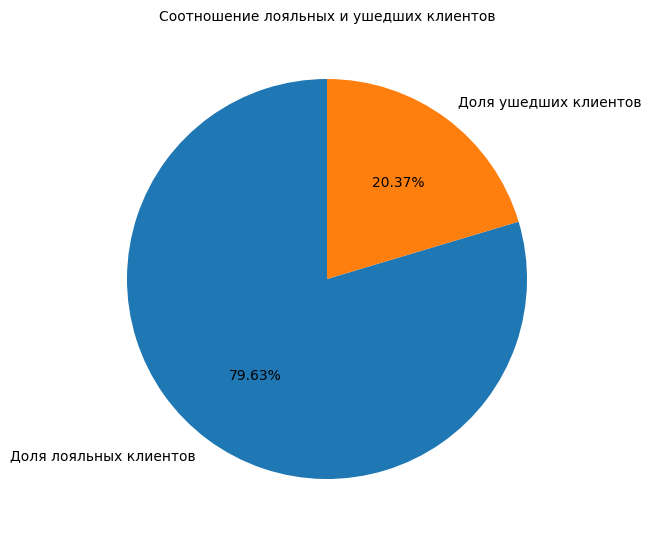

In [9]:
# Задание № 9.1.
# соотношение лояльных и нелояльных клиентов (признак Exited)

# Нужна круговая диаграмма, т.к. она лучше всего покажет такое соотношение.
# Код для построения графика

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes((1, 1, 1, 1))
churn = churn_data['Exited'].value_counts().sort_values(ascending=False).head()
pie = ax.pie(
    churn,
    labels=['Доля лояльных клиентов', 'Доля ушедших клиентов'],
    autopct='%1.2f%%',
    startangle=90
)
title = ax.set_title('Соотношение лояльных и ушедших клиентов', fontsize=10)
#plt.show(pie)


выводы из задания № 9.1.
Как мы видим, доля лояльных клиентов почти в 4 раза больше, чем доля клиентов, ушедших из банка.
Это видно исходя из представленного графика и данных таблицы, представленной выше. 

In [10]:
# Задание №9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.

In [11]:
# чтобы не вносить изменения в изначальные данные таблицы, сделаю копию таблицы и поменяю в ней данные 'Balance'. Как видно из info, у меня это получилось. 

df_churn = churn_data.copy()

df_churn = df_churn[df_churn['Balance'] > 2500]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 1 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        6383 non-null   int64  
 1   CustomerId       6383 non-null   int64  
 2   Surname          6383 non-null   object 
 3   CreditScore      6383 non-null   int64  
 4   Geography        6383 non-null   object 
 5   Gender           6383 non-null   object 
 6   Age              6383 non-null   int64  
 7   Tenure           6383 non-null   int64  
 8   Balance          6383 non-null   float64
 9   NumOfProducts    6383 non-null   int64  
 10  HasCrCard        6383 non-null   int64  
 11  IsActiveMember   6383 non-null   int64  
 12  EstimatedSalary  6383 non-null   float64
 13  Exited           6383 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 748.0+ KB


In [12]:
fig = px.histogram(data_frame=df_churn['Balance'], 
            x = 'Balance',
            title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
            nbins = 100
            )
fig.show()

Text(0.5, 0, 'Баланс')

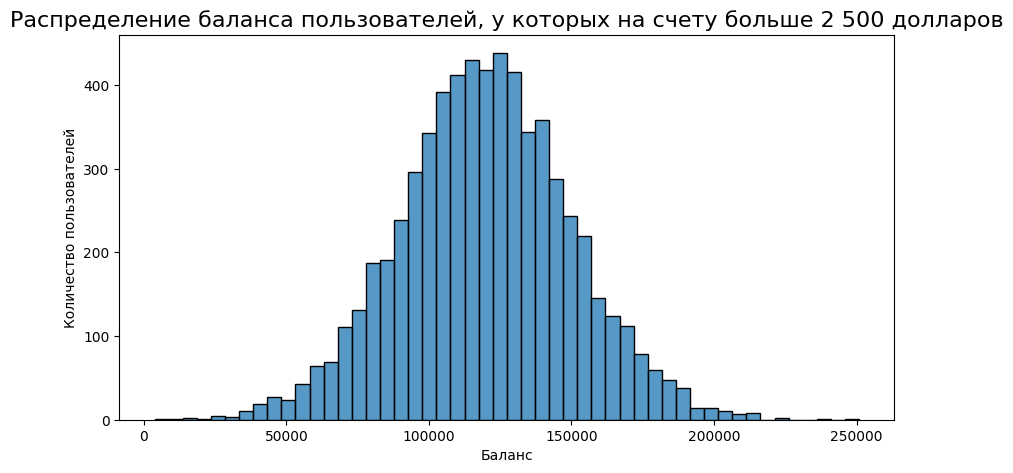

In [13]:
# я построил график двумя разными способами. Первый, конечно, более информативный и интересный.  

fig = plt.figure(figsize=(10, 5))
churn = df_churn['Balance'].value_counts().sort_values(ascending=False).head()

histplot = sns.histplot(
    data=df_churn, 
    x='Balance', 
    bins=50,
    )
histplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=16)
histplot.set_ylabel('Количество пользователей')
histplot.set_xlabel('Баланс')

In [14]:
# выводы: 
# как мы видим, наибольшее количество людей имеет на счете порядка 120-125 тыс $. Количество таких людей составляет 450 человек. 

In [15]:
# Задание № 9.3. 
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

# Буду использовать коробчатую диаграмму. Целевой признак - Exited.

In [16]:
churn_data['Exited'].info

<bound method Series.info of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

Text(0, 0.5, 'Баланс')

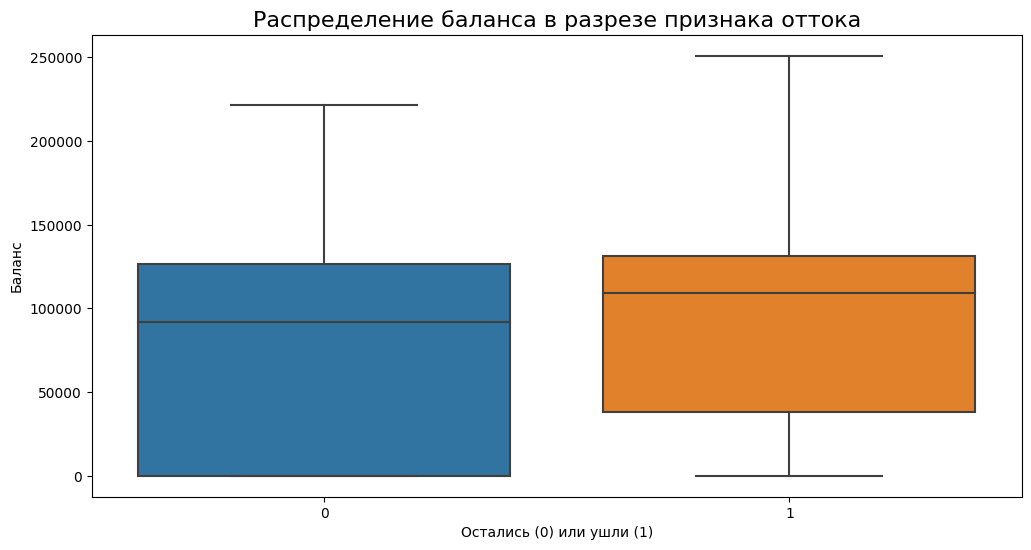

In [17]:
fig = plt.figure(figsize=(12,6))
boxplot = sns.boxplot(data = churn_data, x = 'Exited', y = 'Balance')
boxplot.set_title('Распределение баланса в разрезе признака оттока', fontsize = 16)
boxplot.set_xlabel('Остались (0) или ушли (1)')
boxplot.set_ylabel('Баланс')

In [18]:
# второй способ построения
fig = px.box(churn_data,
            y = 'Balance',
            x = 'Exited',
            points='all',
            notched=True,
            color='Exited',
            title='Распределение баланса в разрезе признака оттока',
            labels=['Остались', 'Ушли'],
            )

fig.show()

In [19]:
# Вывод: из представленных графиков видно, что у ушедших клиентов денежных средств на счетах было больше, чем у тех, которые остались. 

In [20]:
# Задание № 9.4.
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

# способ реализации аналогичный тому, что был выше. 

Text(0, 0.5, 'Возраст')

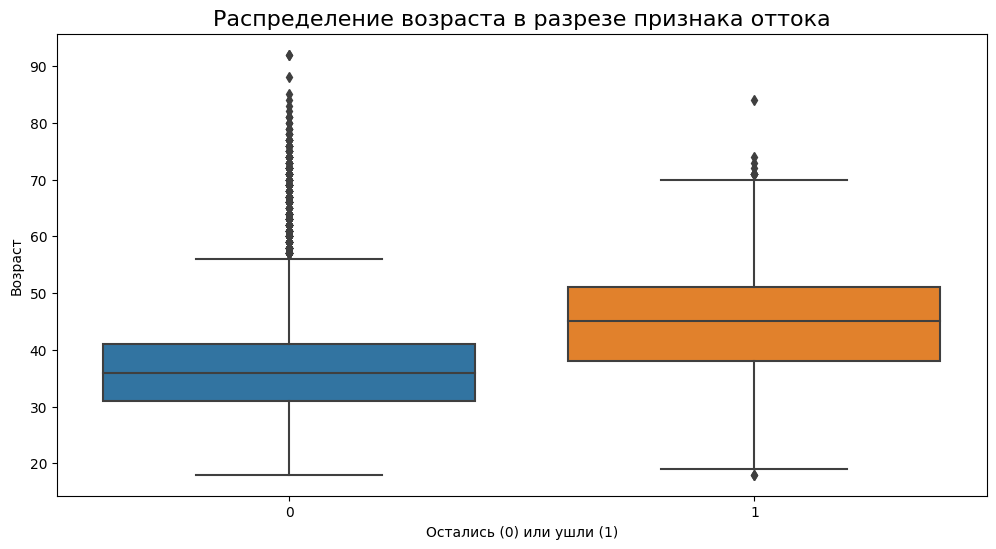

In [21]:
fig = plt.figure(figsize=(12,6))
boxplot = sns.boxplot(data = churn_data, x = 'Exited', y = 'Age')
boxplot.set_title('Распределение возраста в разрезе признака оттока', fontsize = 16)
boxplot.set_xlabel('Остались (0) или ушли (1)')
boxplot.set_ylabel('Возраст')

In [22]:
# второй способ, но первый мне понравился больше.
fig = px.box(churn_data,
            y = 'Age',
            x = 'Exited',
            points='all',
            notched=True,
            color='Exited',
            title='Распределение возраста в разрезе признака оттока',
            labels=['Остались', 'Ушли'],
            )

fig.show()

In [23]:
# выводы: 
# потенциальных выборосов больше в группе оставшихся клиентов (0).
# обратить внимание надо на группу лиц старше 56 лет. 

In [24]:
# Задание № 9.5.
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.

In [26]:
fig = px.scatter(churn_data, 
                x='CreditScore',
                y='EstimatedSalary',
                color='Exited',
                size='CreditScore',
                hover_data=['Age', 'Balance'], # Добавил эти данные, чтобы при наведении на график отображался возраст, зарплата, баланс. Это показалось мне интересным.
                title='Взаимосвязь кредитного рейтинга и зарплаты клиента',
                )
fig.show()

In [27]:
# вывод: 
# я не вижу взаимосвязи между зарплатой и кредитным рейтингом. Есть люди, у которых зарплата более 197 000 $ и у них кредитный рейтинг 425, 
# а есть люди с зарплатой 194 000 $ с кредитным рейтингом 834. Из графика видно, что эти признаки между собой не соотносятся. 

In [29]:
# Задание № 9.6.
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
# Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, 
# среднее арифметическое по столбцу обозначает долю ушедших клиентов).


# сначала построю диаграмму для изучения того, какое соотношение мужчин и женщин в банке в целом (мне просто интересно).

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes((1, 1, 1, 1))
churn = churn_data['Gender'].value_counts().sort_values(ascending=False).head()
pie = ax.pie(
    churn,
    labels=['Мужчины', 'Женщины'],
    autopct='%1.2f%%',
    startangle=90
)
title = ax.set_title('Соотношение мужчин и женщин в целом как клиентов банка', fontsize=10)
#plt.show(pie)

In [30]:
churn_data.groupby('Gender').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,,,
Female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
Male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457


In [31]:
# теперь смотрим, сколько всего ушло женщин и сколько всего ушло мужчин
# Женщины: всего 4543
# Мужчины: всего 5457
gender_box = churn_data[['Gender', 'Exited']]
gender_box

,Gender,Exited
0,Female,1
1,Female,0
2,Female,1
3,Female,0
4,Female,0
...,...,...
9995,Male,0
9996,Male,0
9997,Female,1
9998,Male,1


In [32]:
Males = gender_box[gender_box['Gender'] == 'Male'] # тут создаю отдельную дату с мужчинами, ниже аналогично сделаю по женщинам.
Males

,Gender,Exited
5,Male,1
6,Male,0
8,Male,0
9,Male,0
10,Male,0
...,...,...
9992,Male,0
9993,Male,0
9995,Male,0
9996,Male,0


In [33]:
Males_0 = Males[Males['Exited'] == 0] # Смотрим, сколько осталось
Males_0 # Итого, мы видим, что из 5457 мужчин клиентами банка осталось 4559 мужчин.

,Gender,Exited
6,Male,0
8,Male,0
9,Male,0
10,Male,0
11,Male,0
...,...,...
9990,Male,0
9992,Male,0
9993,Male,0
9995,Male,0


In [54]:
print((len(Males_0)*100/len(Males)), '%') # это % мужчин, которые остались. Округлим до целых

83.54407183434121 %


In [35]:
# Аналогично идем смотреть женщин
Females = gender_box[gender_box['Gender'] == 'Female']
Females

,Gender,Exited
0,Female,1
1,Female,0
2,Female,1
3,Female,0
4,Female,0
...,...,...
9982,Female,1
9991,Female,1
9994,Female,0
9997,Female,1


In [36]:
Females_0 = Females[Females['Exited'] == 0] # Смотрим, сколько осталось
Females_0 # Итого, мы видим, что из 4543 женщин клиентами банка осталось 3404 женщины. 


,Gender,Exited
1,Female,0
3,Female,0
4,Female,0
12,Female,0
13,Female,0
...,...,...
9976,Female,0
9977,Female,0
9979,Female,0
9994,Female,0


In [37]:
print(len(Females_0)*100/len(Females), "%") # это % женщин, которые остались. 

74.92846136913934 %


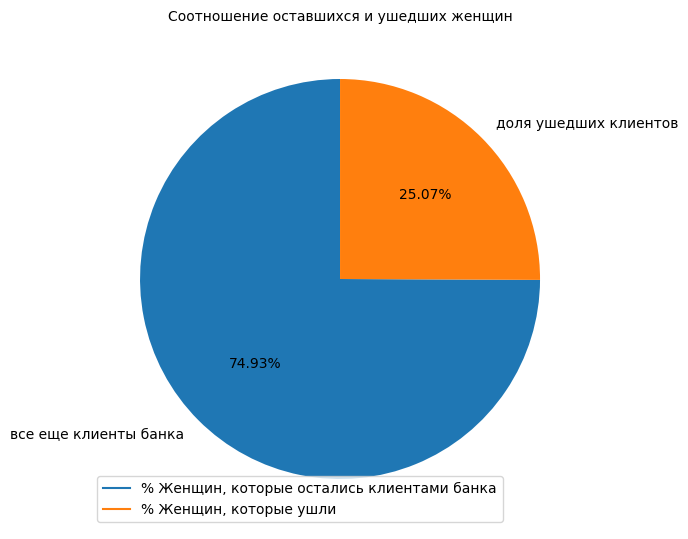

In [39]:
# теперь визуализируем картинку (по женщинам). 74,93% женщин осталось. 25,07% ушло
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes((1, 1, 1, 1))
line1, = ax.plot([1], label='% Женщин, которые остались клиентами банка') # добавил для красоты легенду. Так ведь приятнее.
line2, = ax.plot([1], label='% Женщин, которые ушли')
ax.legend(handles=[line1, line2])
Data = Females['Exited'].value_counts().sort_values(ascending=False).head()
pie = ax.pie(
    Data,
    labels=['все еще клиенты банка', 'доля ушедших женщин'],
    autopct='%1.2f%%',
    startangle=90
)
title = ax.set_title('Соотношение оставшихся и ушедших женщин', fontsize=10)
#plt.show(pie)

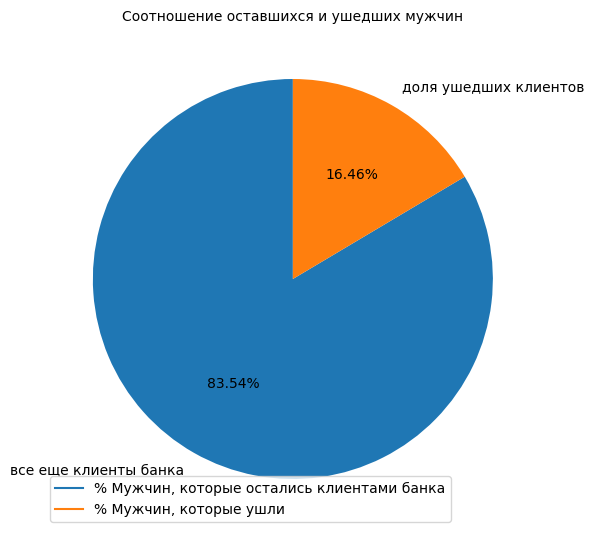

In [40]:
# теперь визуализируем картинку (по мужчинам). 83,54% мужчин осталось. 16,46% ушло
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes((1, 1, 1, 1))
line1, = ax.plot([1], label='% Мужчин, которые остались клиентами банка')
line2, = ax.plot([1], label='% Мужчин, которые ушли')
ax.legend(handles=[line1, line2])
Data = Males['Exited'].value_counts().sort_values(ascending=False).head()
pie = ax.pie(
    Data,
    labels=['все еще клиенты банка', 'доля ушедших мужчин'],
    autopct='%1.2f%%',
    startangle=90
)
title = ax.set_title('Соотношение оставшихся и ушедших мужчин', fontsize=10)
#plt.show(pie)

In [41]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [55]:
grouped = (churn_data.groupby(by='NumOfProducts', as_index=False)['Exited'].sum()
    )

fig = px.bar(grouped,
             x="NumOfProducts",
             y="Exited", color='Exited', 
             height=600,
             title='Как отток клиентов зависит от числа приобретённых у банка услуг?')
fig.show()

In [43]:
# Вывод: 
# чем меньше число продуктов приобретено, тем больше отток клиентов.

In [44]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?


In [45]:
grouped = (churn_data.groupby(by='IsActiveMember', as_index=False)['Exited'].sum()
    )
# активный клиент = 1, неактивный = 0
fig = px.bar(grouped,
             x="IsActiveMember",
             y="Exited", color='Exited', 
             height=600,
             title='Как влияет наличие статуса активного клиента на отток клиентов?')
fig.show()

In [46]:
# Вывод: 
# Если клиент не активен, он скорее уйдет из банка. Я бы посоветовал активнее предоставлять клиенту новые услуги. Это, как показано на предыдущем 
# графике, положительно сказывается на том, чтобы клиент оставался. + звонок от банка напомнит клиенту о том, что такой банк все еще есть.

In [47]:
# 9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.

In [48]:
grouped = (churn_data.groupby(by='Geography', as_index=False)['Exited'].sum()
)
pivot = grouped.pivot_table(
    values='Exited',
    columns='Geography'
)

fig = go.Figure(data=go.Heatmap(x=pivot.columns,
                                y = churn_data.Exited,
                                z = pivot.values
                               ))

fig.show()

In [49]:
# самая большая доля ушедших клиентов во Франции и Германии. 
# предположу, что это связано с тем, что людям выгоднее приобретать что-то, нежели хранить деньги в банках. Возможно, низкий % по вкладам.

In [50]:
# 9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [51]:
# def get_credit_score_cat(credit_score):
    #if credit_score >= 300 and credit_score < 500:
        #return "Very_Poor"
    #elif credit_score >= 500 and credit_score < 601:
        #return "Poor"
    #elif credit_score >= 601 and credit_score < 661:
        #return "Fair"
    #elif credit_score >= 661 and credit_score < 781:
        #return "Good"
    #elif credit_score >= 781 and credit_score < 851:
        #return "Excellent"
    #elif credit_score >= 851:
        #return "Top"
    #elif credit_score < 300:
        #return "Deep"


In [52]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)

fig = go.Figure(data=go.Heatmap(                 
                   z = pivot,
                   x = pivot.columns,
                   y= churn_data['CreditScoreCat'].unique(),
                   text=pivot.values.round(2),
                   texttemplate="%{text}",
                   textfont={"size":15}
                   )
)
fig.update_layout(template = 'plotly_dark') # добавлю красоты
fig.show()

In [53]:
# Чаще всего уходят люди, которые находятся в категориях very_poor и poor. 